# PREDICTING SECONDARY SCHOOL STUDENT PERFORMANCE USING CLASSIFICASTION AND REGRESSION TREE
## By: Ashraf Eskandar Ali Al-aghbari (P113003)


In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [60]:
os.chdir('D:/UKM/Data Science & Analytics/Machine Learning/assignment3')

In [61]:
mat = pd.read_csv('student-mat.csv',sep=";")

In [62]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [64]:
mat['goout']=pd.Categorical(mat['goout'])
pd.get_dummies(mat[['goout']])

,goout_1,goout_2,goout_3,goout_4,goout_5
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
390,0,0,0,1,0
391,0,0,0,0,1
392,0,0,1,0,0
393,1,0,0,0,0


In [ ]:
OrdinalEncoder()

In [34]:
from sklearn.preprocessing import OrdinalEncoder
# creating instance of one-hot-encoder
enc = OrdinalEncoder()
# passing bridge-types-cat column (label encoded values of bridge_types)
pd.DataFrame(enc.fit_transform(mat[['goout']]))

,0
0,3.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
390,3.0
391,4.0
392,2.0
393,0.0


In [5]:
mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [6]:
#find the total of missing values
mat.isnull().sum().sum()

0

In [7]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
dummies_1 = pd.get_dummies(mat[['school', 'sex', 'address', 'famsize','Mjob', 'Fjob', 'reason',
                             'guardian','schoolsup', 'famsup', 'paid', 'activities',
                              'nursery','higher', 'internet', 'romantic']])

In [10]:
dummies_1

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Mjob_at_home,Mjob_health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
391,0,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
392,0,1,0,1,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
393,0,1,0,1,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0


In [11]:
dummies_2 =pd.concat([pd.get_dummies(mat['Medu'],prefix="medu"),
pd.get_dummies(mat['Fedu'],prefix="fedu"),
pd.get_dummies(mat['traveltime'],prefix="traveltime"),
pd.get_dummies(mat['studytime'],prefix="studytime"),
pd.get_dummies(mat['failures'],prefix="failures"),
pd.get_dummies(mat['famrel'],prefix="famrel"),
pd.get_dummies(mat['freetime'],prefix="freetime"),
pd.get_dummies(mat['goout'],prefix="goout"),
pd.get_dummies(mat['Dalc'],prefix="Dalc"),
pd.get_dummies(mat['Walc'],prefix="Walc"),
pd.get_dummies(mat['health'],prefix='health')],axis=1)

In [12]:
dummies = pd.concat([dummies_1,dummies_2],axis=1)

In [13]:
!pip install graphviz

In [14]:
dummies_2

,medu_0,medu_1,medu_2,medu_3,medu_4,fedu_0,fedu_1,fedu_2,fedu_3,fedu_4,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
391,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
392,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
393,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [15]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [16]:
import graphviz

# Regression Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
from sklearn.metrics import  mean_squared_error

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = pd.concat([dummies,mat.age,mat.absences],axis=1)
y = mat.G1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [21]:
regr_tree = DecisionTreeRegressor(max_depth=4)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

9.716377139913504

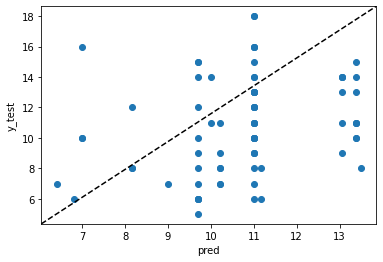

In [22]:
pred = regr_tree.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'GT1')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)


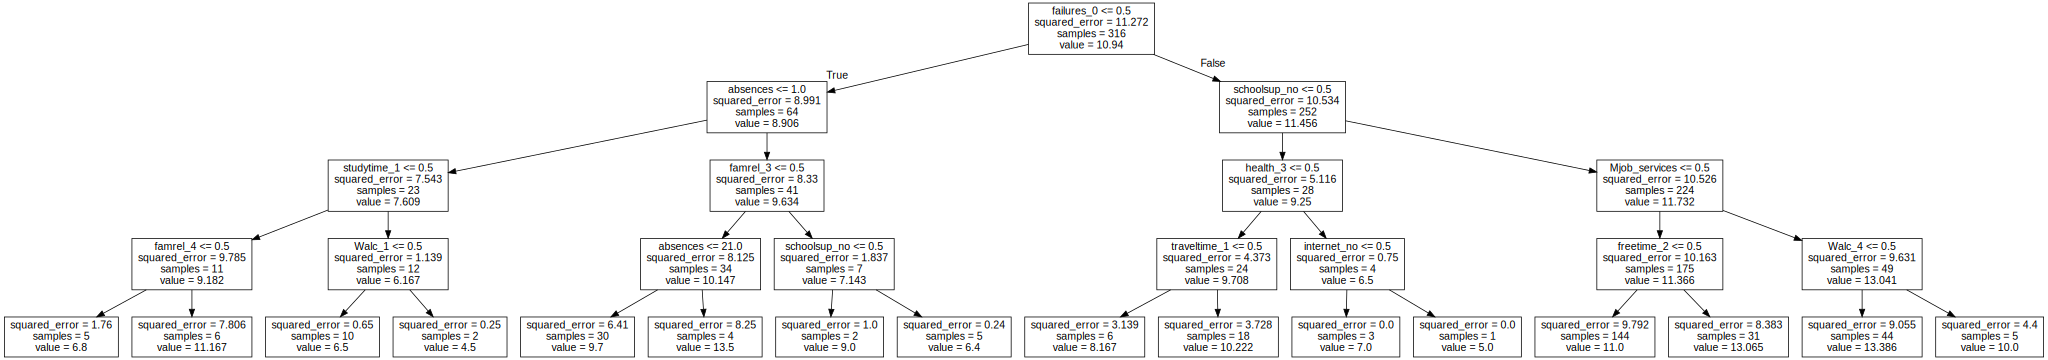

In [26]:
export_graphviz(regr_tree, 
                out_file = "student-mat_tree_reg.dot", 
                feature_names = X_train.columns)

with open("student-mat_tree_reg.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from subprocess import check_call
check_call(['dot','-Tpdf','student-mat_tree_reg.dot','-o','student-mat_tree_reg.pdf'])

# Classification Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
bins = pd.IntervalIndex.from_tuples([(0, 4), (5, 8), (9, 12),(13,16),(17,20)])

In [30]:
mat['G2T'] = pd.cut(mat.G2, bins=[0,4,8,12,16,20],labels=["E", "D", "C","B","A"],include_lowest =True)

In [31]:
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G2T
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,D
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,D
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,C
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,B
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,D
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,C


In [32]:
X_classi = pd.concat([dummies,mat.age,mat.absences],axis=1)
y_classi = mat.G2T
X_train_classi, X_test_classi, y_train_classi, y_test_classi = train_test_split(X_classi, y_classi,
                                                                                train_size = 0.8, random_state = 1)

In [33]:
#Using max_depth, criterion will suffice for DT Models, rest all will remain constant 
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [36]:
DT_grid.fit(X_train_classi, y_train_classi)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [37]:
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       min_samples_split=6)

In [48]:
classi_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       min_samples_split=6)

In [50]:
classi_tree.fit(X_train_classi, y_train_classi)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       min_samples_split=6)

In [53]:
classi_tree.score(X_train_classi, y_train_classi)

0.4208860759493671

In [54]:
classi_tree.score(X_test_classi, y_test_classi)

0.5443037974683544

In [56]:
from sklearn.metrics import confusion_matrix

In [60]:
pred = classi_tree.predict(X_test_classi)

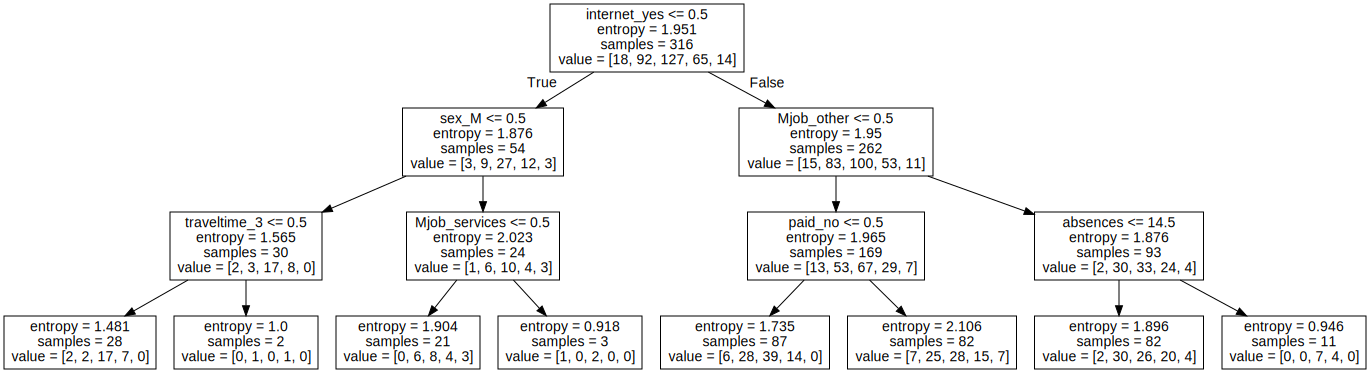

In [44]:
export_graphviz(classi_tree, 
                out_file = "student_math_classi.dot", 
                feature_names = X_train_classi.columns)

with open("student_math_classi.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [68]:
from subprocess import check_call
check_call(['dot','-Tpdf','student_math_classi.dot','-o','student_math_classi.pdf'])

0

In [67]:
mat.G2T.unique()

['D', 'B', 'C', 'A', 'E']
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']